<a href="https://colab.research.google.com/github/PeterHassaballah/ImageProcessingTask1/blob/master/assign1ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from math import *
import matplotlib.pylab as plt
from PIL import Image
from google.colab.patches import cv2_imshow

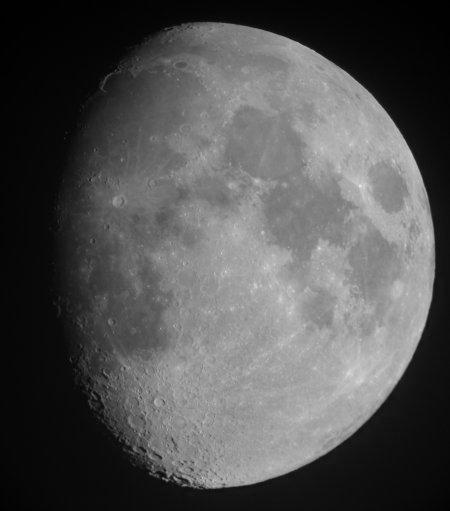

In [0]:
imgPath = './Moon.jpg'
img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

In [0]:
#I impemented cv2 Discrete fourier transform then refined it using numpy Fast fourier transform
def get_dft(img):
        dft_A = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT|cv2.DFT_SCALE)
        dft_A = np.fft.fftshift(dft_A)
        return dft_A

In [0]:
def get_butter(dimg, order=3):
        dft4img=dimg
        h, w = dft4img.shape[0], dft4img.shape[1]
        stopband=10
        #coordinates to the center
        P = h/2
        Q = w/2
        dst = np.zeros((h, w, 2), np.float64)
        for i in range(h):
            for j in range(w):
                r2 = float((i-P)**2+(j-Q)**2)
                if r2 == 0:
                    r2 = 1.0
                dst[i,j] = 1/(1+(r2/stopband)**order)
        dst = np.float64(dst)
        resol = cv2.magnitude(dst[:,:,0], dst[:,:,1])
        # cv2_imshow(dst)
        # cv2_imshow(resol)
        return dst

In [0]:
def update_butter(img,dimg):
       
        bw_filter = get_butter(dimg)
        dst_complex = bw_filter * dimg
        dst_complex = cv2.idft(np.fft.ifftshift(dst_complex))
        dst = np.uint8(cv2.magnitude(dst_complex[:,:,0], dst_complex[:,:,1]))
        tmp = dst
        fin=get_dft(tmp)
        return tmp
        # cv2_imshow( dst)


In [0]:
#Low Pass butter worth filter
def butter_filter(img):
        #max kernel size 
        max_ksize = max(img.shape[0], img.shape[1])
        #Discrete fourier transform image
        dft4img = get_dft(img)
        # cv2_imshow(dft4img)
        last_img=update_butter(img,dft4img)
        print ("Reducing high frequency noise")
        # cv2_imshow(last_img)
        return last_img

Reducing high frequency noise


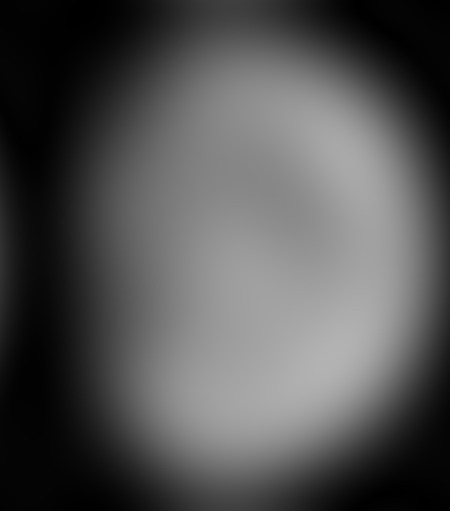

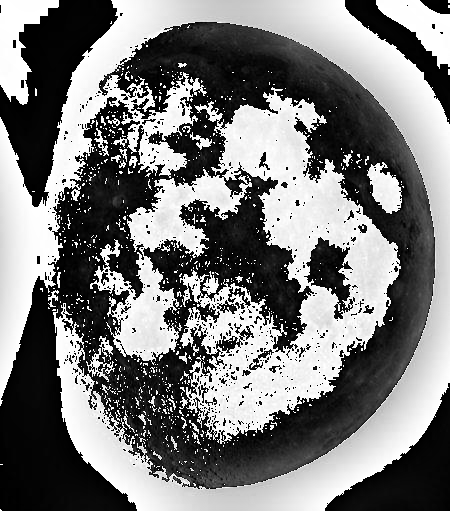

In [0]:
# fshift = get_dft(img)
out_img=butter_filter(img)
#to get high pass subtract the image array from the low pass array 
cv2_imshow(out_img)
z= np.array(img) - np.array(out_img)
cv2_imshow(z)


In [0]:
def highPass(image, order, d0, constant ):

    fshift = np.fft.fftshift(image)
    f = np.fft.fft(fshift)

    rows, cols = f.shape

    H = np.zeros(image.shape)

    for i in range(-int(rows/2), int(rows/2)):
        for j in range(-int(cols/2), int(cols/2)):

            distance = sqrt((i*i + j*j))
            if distance == 0:
                value = 1/(1 + (d0 ** (2 * order)))
            else:
                value = 1/(1 + ((d0 / distance) ** (2 * order)))

            H[i, j] = (constant -1) + value

    resImage = np.multiply(f, H)

    ifo = np.fft.ifft(resImage)
    ifshift = np.fft.ifftshift(ifo.real)

    res = Image.fromarray(ifshift)
    res = res.convert("L")
    marwan=ifshift
    cv2_imshow(marwan)

    


# im = cv2.imread("Sphinx.png")
# gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# im2 = his_equal(gray)
# imRes = Image.fromarray(im2)
# imRes.save("Eq.jpg")



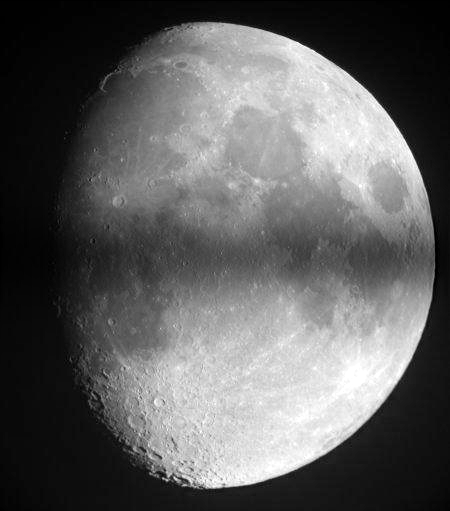

In [35]:
im = cv2.imread("./Moon.jpg")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
highPass(gray, 1, 50, 1.5)